# Decision Tree

>*Decision tree adalah jenis algoritma klasifikasi yang strukturnya mirip seperti sebuah pohon yang memiliki akar, ranting, dan daun. Simpul akar (internal node) mewakili fitur pada dataset, simpul ranting (branch node) mewakili aturan keputusan (decision rule), dan tiap-tiap simpul daun (leaf node) mewakili hasil keluaran.*

>Dalam algoritma Decision tree, terdapat 2 node, yakni **Decision Node** dan **Leaf Node**.



>1.   Decision node digunakan untuk membuat keputusan berdasarkan fitur dari dataset yang diberikan. Node ini memiliki simpul cabang, bisa berupa decision node atau leaf node.
>2.   Leaf node digunakan untuk mewakili keluaran hasil keputusan dari simpul induknya (decision node). Node ini tidak memiliki simpul cabang.


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
d3 = DecisionTreeClassifier()
d3.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

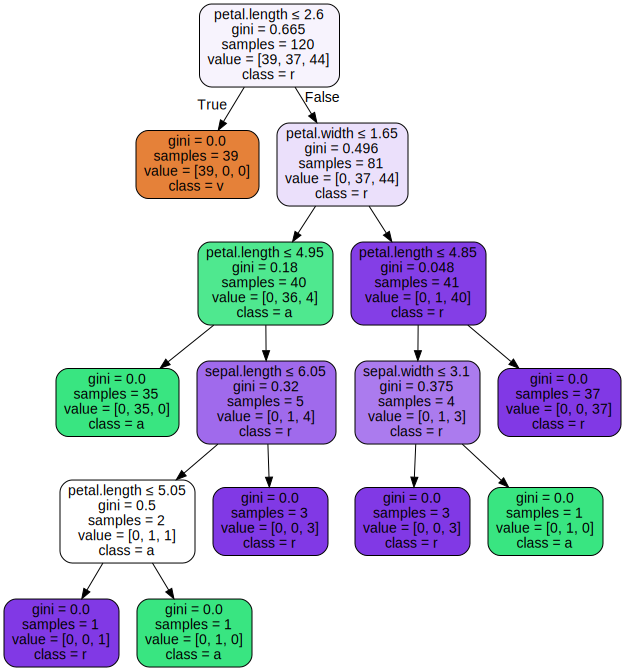

In [ ]:
import graphviz 
dot_data =export_graphviz(d3, out_file=None, feature_names=df.columns[:-1], class_names=df.columns[-1],  filled=True, rounded=True,  special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

In [ ]:
y_predic = d3.predict(X_test)
y_predic

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica'],
      dtype=object)

In [ ]:
data_predic = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_predic, columns=["Predict"]).reset_index(drop=True)], axis=1)
data_predic

,variety,Predict
0,Setosa,Setosa
1,Versicolor,Versicolor
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Virginica,Virginica
5,Versicolor,Versicolor
6,Virginica,Virginica
7,Setosa,Setosa
8,Setosa,Setosa
9,Virginica,Virginica


In [ ]:
correct = data_predic.loc[data_predic["variety"] == data_predic["Predict"]]

In [ ]:
from sklearn.metrics import accuracy_score
print(f'acuraty = {"{:,.2f}".format(accuracy_score(y_test, y_predic)*100)}%')
print(f'dari data prediksi {correct.shape[0]} / {data_predic.shape[0]} * 100% = {"{:,.2f}".format((correct.shape[0]) / (data_predic.shape[0]) * 100)}%' )

acuraty = 96.67%
dari data prediksi 29 / 30 * 100% = 96.67%
